## Scrape the Location Counts

### 1. Use the beautifulsoup library to scrape the data (from the link above) on state names and corresponding number of store locations, for the following chains:
* Starbucks

* Dunkin’ Donuts

In [55]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [56]:
# starbucks
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
starbucks_soup = BeautifulSoup(response.content, "html.parser")
starbucks_tables = starbucks_soup.find_all("table", class_ = "wpr-table")[0]


In [57]:
# create empty lists for the dictionaries
starbucks_rows = []
states_list = []

for th in starbucks_tables.find_all("th")[4:]:
    states = th.get_text(strip = True)
    states_list.append(states)

for i, tr in enumerate(starbucks_tables.find_all("tr")[1:]):
    state = states_list[i]

    cells = tr.find_all("td")
    
    # extract cells for stores in 2023, 2021, and 2024
    stores2023 = cells[0].get_text(strip=True)
    stores2021 = cells[1].get_text(strip=True)
    stores2024 = cells[2].get_text(strip=True)

    # append the rows with the dictionaries
    starbucks_rows.append({
        "State": state,
        "Year": 2023,
        "Starbucks Stores": stores2023, 
        "Company": "Starbucks"
    })
    starbucks_rows.append({
        "State": state,
        "Year": 2021,
        "Starbucks Stores": stores2021,
        "Company": "Starbucks"
    })
    starbucks_rows.append({
        "State": state,
        "Year": 2024,
        "Starbucks Stores": stores2024, 
        "Company": "Starbucks"
    })

# convert into a data frame
df = pd.DataFrame(starbucks_rows)
print(df)

            State  Year Starbucks Stores    Company
0      California  2023            3,080  Starbucks
1      California  2021            2,959  Starbucks
2      California  2024            3,117  Starbucks
3           Texas  2023            1,346  Starbucks
4           Texas  2021            1,215  Starbucks
..            ...   ...              ...        ...
148  North Dakota  2021               20  Starbucks
149  North Dakota  2024                   Starbucks
150       Vermont  2023                8  Starbucks
151       Vermont  2021               35  Starbucks
152       Vermont  2024                   Starbucks

[153 rows x 4 columns]
            State  Year Starbucks Stores    Company
0      California  2023            3,080  Starbucks
1      California  2021            2,959  Starbucks
2      California  2024            3,117  Starbucks
3           Texas  2023            1,346  Starbucks
4           Texas  2021            1,215  Starbucks
..            ...   ...              ...

In [58]:
#dunkin
dunkin_response = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
dunkin_soup = BeautifulSoup(dunkin_response.content, "html.parser")
dunkin_table = dunkin_soup.find("table", class_ = "wpr-table")

In [59]:
# create empty lists for the dictionaries
dunkin_rows = []
states_list = []

for th in dunkin_table.find_all("th")[3:]:
    states = th.get_text(strip = True)
    states_list.append(states)

for i, tr in enumerate(dunkin_table.find_all("tr")[1:]):
    state = states_list[i]

    cells = tr.find_all("td")

    # extract cells for stores
    dunkin_stores2024 = cells[0].get_text(strip=True)
    dunkin_stores2023 = cells[1].get_text(strip=True)

    #append the rows with the dictionaries
    dunkin_rows.append({
        "State": state,
        "Year": 2024,
        "Dunkin Stores": dunkin_stores2024,
        "Company": "Dunkin"
    })
    dunkin_rows.append({
        "State": state,
        "Year": 2023,
        "Dunkin Stores": dunkin_stores2023,
        "Company": "Dunkin"
    })
# convert to data frame
df = pd.DataFrame(dunkin_rows)
print(df)

             State  Year Dunkin Stores Company
0         New York  2024         1,431  Dunkin
1         New York  2023         1,414  Dunkin
2    Massachusetts  2024         1,042  Dunkin
3    Massachusetts  2023         1,068  Dunkin
4          Florida  2024           909  Dunkin
..             ...   ...           ...     ...
97          Oregon  2023             0  Dunkin
98    South Dakota  2024             0  Dunkin
99    South Dakota  2023             0  Dunkin
100     Washington  2024             0  Dunkin
101     Washington  2023            19  Dunkin

[102 rows x 4 columns]
             State  Year Dunkin Stores Company
0         New York  2024         1,431  Dunkin
1         New York  2023         1,414  Dunkin
2    Massachusetts  2024         1,042  Dunkin
3    Massachusetts  2023         1,068  Dunkin
4          Florida  2024           909  Dunkin
..             ...   ...           ...     ...
97          Oregon  2023             0  Dunkin
98    South Dakota  2024            

### 2. Parse, merge and tidy your data. Think carefully about what the tidy version of this dataset is with multiple years represented on the website.

In [60]:
# rename the dataframes
df_dunkin = pd.DataFrame(dunkin_rows)
df_starbucks = pd.DataFrame(starbucks_rows)

#merge two data frames
coffee = pd.merge(df_dunkin, df_starbucks, on=["State", "Year", "Company"], how="outer")
print(coffee)


       State  Year Dunkin Stores    Company Starbucks Stores
0    Alabama  2021           NaN  Starbucks               99
1    Alabama  2023            59     Dunkin              NaN
2    Alabama  2023           NaN  Starbucks               85
3    Alabama  2024            69     Dunkin              NaN
4    Alabama  2024           NaN  Starbucks                 
..       ...   ...           ...        ...              ...
250  Wyoming  2021           NaN  Starbucks               26
251  Wyoming  2023             1     Dunkin              NaN
252  Wyoming  2023           NaN  Starbucks               23
253  Wyoming  2024             1     Dunkin              NaN
254  Wyoming  2024           NaN  Starbucks                 

[255 rows x 5 columns]
       State  Year Dunkin Stores    Company Starbucks Stores
0    Alabama  2021           NaN  Starbucks               99
1    Alabama  2023            59     Dunkin              NaN
2    Alabama  2023           NaN  Starbucks               85


## Supplemental Data

### 4. Scrape the state names and populations from this wikipedia page. Merge these data with your coffee dataset.

In [61]:
pop_response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
pop_soup = BeautifulSoup(pop_response.content, "html.parser")
pop_table = pop_soup.find("table", class_ = "wikitable")

pop_rows = []

for tr in pop_table.find_all("tr")[1:]:
    cells = tr.find_all('td')
    if len(cells) >= 3:
        state = cells[2].get_text(strip = True)
        population = cells[3].get_text(strip = True)


        pop_rows.append({
        "State": state,
        "Population": population})

# convert to data frame
pop_df = pd.DataFrame(pop_rows)

# merge two data frames
coffee_new = pd.merge(coffee, pop_df, on="State", how = "outer")
print(coffee_new)


       State    Year Dunkin Stores    Company Starbucks Stores Population
0    Alabama  2021.0           NaN  Starbucks               99  5,024,279
1    Alabama  2023.0            59     Dunkin              NaN  5,024,279
2    Alabama  2023.0           NaN  Starbucks               85  5,024,279
3    Alabama  2024.0            69     Dunkin              NaN  5,024,279
4    Alabama  2024.0           NaN  Starbucks                   5,024,279
..       ...     ...           ...        ...              ...        ...
259  Wyoming  2021.0           NaN  Starbucks               26    576,851
260  Wyoming  2023.0             1     Dunkin              NaN    576,851
261  Wyoming  2023.0           NaN  Starbucks               23    576,851
262  Wyoming  2024.0             1     Dunkin              NaN    576,851
263  Wyoming  2024.0           NaN  Starbucks                     576,851

[264 rows x 6 columns]
       State    Year Dunkin Stores    Company Starbucks Stores Population
0    Alabama  

### 5. Find the revenue, stock price, or your financial metric of choice for each of the companies listed above (if you can find a website to scrape these from that’s great!…but it’s okay if you manually enter these). Merge these values into your big dataset. Note: these values may be repeated for each state.

In [62]:
# stock prices
# 97.31 for starbucks
# 106.48 for dunkin 
financial_data = {
    "Company": ["Starbucks", "Dunkin", "Starbucks", "Dunkin", "Starbucks", "Dunkin"],
    "Stock Price": [97.31, 106.48, 95.88, 106.48, 116.38, 106.48], 
    "Year": [2024, 2024, 2023, 2023, 2021, 2021]
}

financial_df = pd.DataFrame(financial_data)

financial_coffee = pd.merge(coffee_new, financial_df, on = ["Company", "Year"], how = "outer")
financial_coffee = financial_coffee.sort_values(by = "State").reset_index(drop=True)
print(financial_coffee)

       State    Year Dunkin Stores  ... Starbucks Stores Population Stock Price
0    Alabama  2023.0            59  ...              NaN  5,024,279      106.48
1    Alabama  2021.0           NaN  ...               99  5,024,279      116.38
2    Alabama  2024.0           NaN  ...                   5,024,279       97.31
3    Alabama  2024.0            69  ...              NaN  5,024,279      106.48
4    Alabama  2023.0           NaN  ...               85  5,024,279       95.88
..       ...     ...           ...  ...              ...        ...         ...
260  Wyoming  2023.0             1  ...              NaN    576,851      106.48
261  Wyoming  2023.0           NaN  ...               23    576,851       95.88
262  Wyoming  2024.0           NaN  ...                     576,851       97.31
263  Wyoming  2021.0           NaN  ...               26    576,851      116.38
264      NaN  2021.0           NaN  ...              NaN        NaN      106.48

[265 rows x 7 columns]
       State    

### 6. Create a region variable in your dataset according to the scheme on this wikipedia page: Northeast, Midwest, South, West. You do not need to scrape this information.

In [63]:
#regions for us
regions = {
    "Conneticut": "Northeast",
    "Maine": "Northeast",
    "Massachusetts": "Northeast",
    "New Hampshire": "Northeast",
    "Rhode Island": "Northeast",
    "Vermont": "Northeast",
    "New Jersey": "Northeast",
    "New York": "Northeast",
    "Pennsylvania": "Northeast",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Michigan": "Midwest",
    "Ohio": "Midwest",
    "Wisconsin": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Minnesota": "Midwest",
    "Missouri": "Midwest",
    "Nebraska": "Midwest",
    "North Dakota": "Midwest",
    "South Dakota": "Midwest",
    "Delaware": "South",
    "Florida": "South",
    "Georgia": "South",
    "Maryland": "South",
    "North Carolina": "South",
    "South Carolina": "South",
    "Virginia": "South",
    "District of Columbia": "South",
    "West Virginia": "South",
    "Alabama": "South",
    "Kentucky": "South",
    "Mississippi": "South",
    "Tennessee": "South",
    "Arkansas": "South",
    "Louisiana": "South",
    "Oklahoma": "South",
    "Texas": "South",
    "Arizona": "West",
    "Colorado": "West",
    "Idaho": "West",
    "Montana": "West", 
    "Nevada": "West", 
    "New Mexico": "West",
    "Utah": "West",
    "Wyoming": "West",
    "Alaska": "West",
    "California": "West",
    "Hawaii": "West",
    "Oregon": "West",
    "Washington": "West"
}

financial_coffee["Regions"] = financial_coffee["State"].map(regions)

In [64]:
financial_coffee["Starbucks Stores"] = pd.to_numeric(financial_coffee["Starbucks Stores"], errors='coerce')
financial_coffee["Dunkin Stores"] = pd.to_numeric(financial_coffee["Dunkin Stores"], errors='coerce')

## Analyze

### 7. Assess and comment on the prevalence of each chain. Some questions to consider (you don’t need to answer all of these and you may come up with your own):

Based on the dataframe, we cannot fully compare the two chains becasue the Starbucks data includes information on years 2021, 2023, and 2024. Dunkin contains information on years 2023 and 2024. A conclusion could be drawn that population is somewhat correlated witht the number of Starbucks Stores. For example, Florida has the highest number of Starbucks stores at 892 stores for 2024 with a population of 21 million, while Vermont has the lowest amount of stores with 8 for 2023 with a population of 643k. The same conclusion could be drawn for Dunkin Stores with Florida having the highest number of stores at 909 with a population of 21 million, while Wyoming has 1 store with a population of 576k. Dunkin is more popular in the South and Northeast regions with there being a higher number of stores in those regions than the others. Starbucks is more popular in the West and South regions with there being a higher number of stores in those regions than others. The financial data shows the change in average stock price for the year, but there is not mauch variance in the stock prices, so it is not taken into account when analyzing the stores for each company per year.

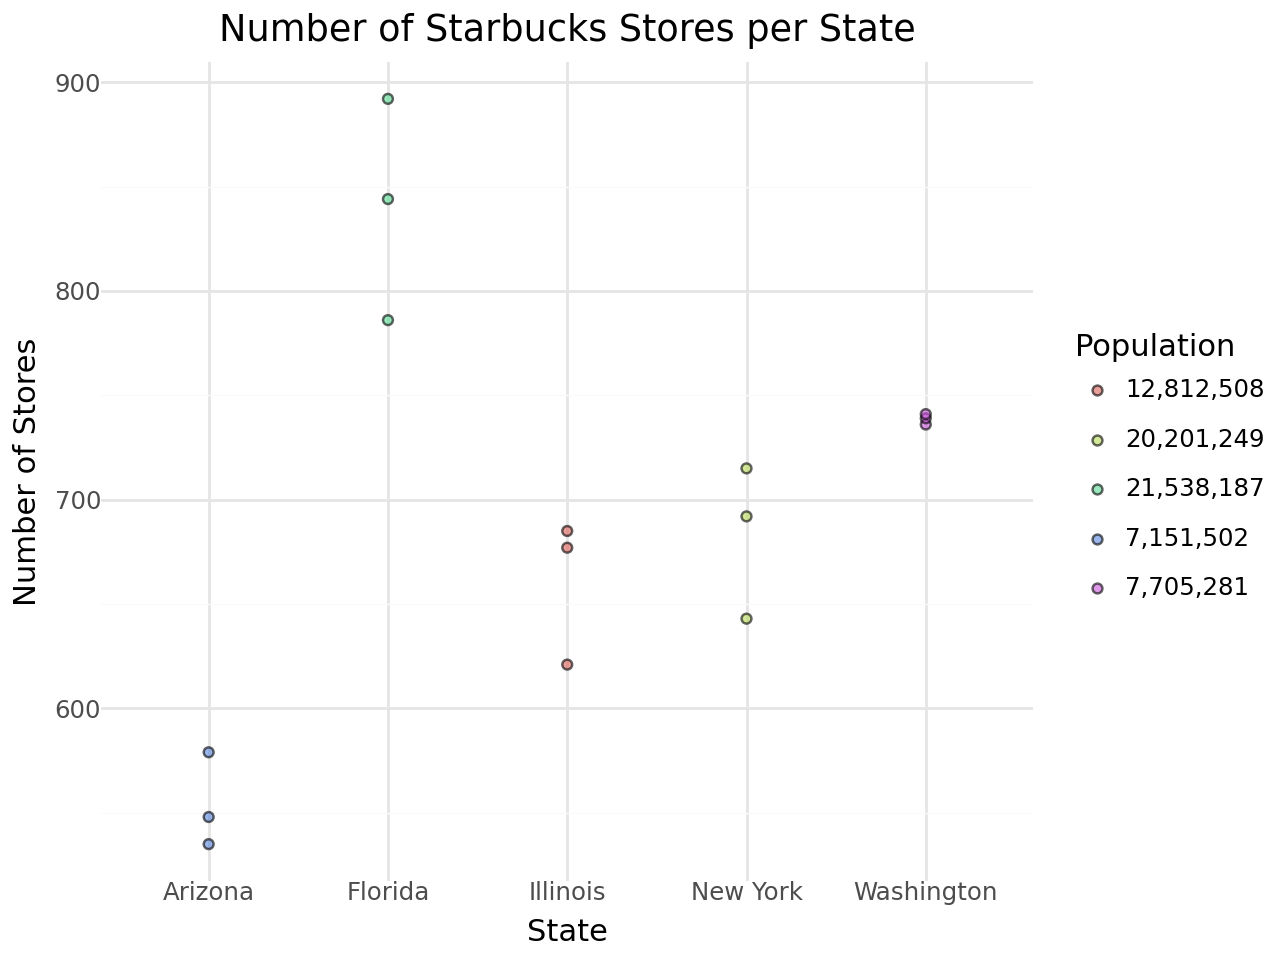

In [65]:
from plotnine import *

state = (
    financial_coffee.groupby("State")
    .agg(mean_vol = ("Starbucks Stores", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
financial_coffee2 = financial_coffee[financial_coffee["State"].isin(state["State"])]

(ggplot(financial_coffee2, aes(x = "State", y = "Starbucks Stores", fill = "Population"))
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(title = "Number of Starbucks Stores per State", x = "State", y = "Number of Stores")
    + theme_minimal()
    )

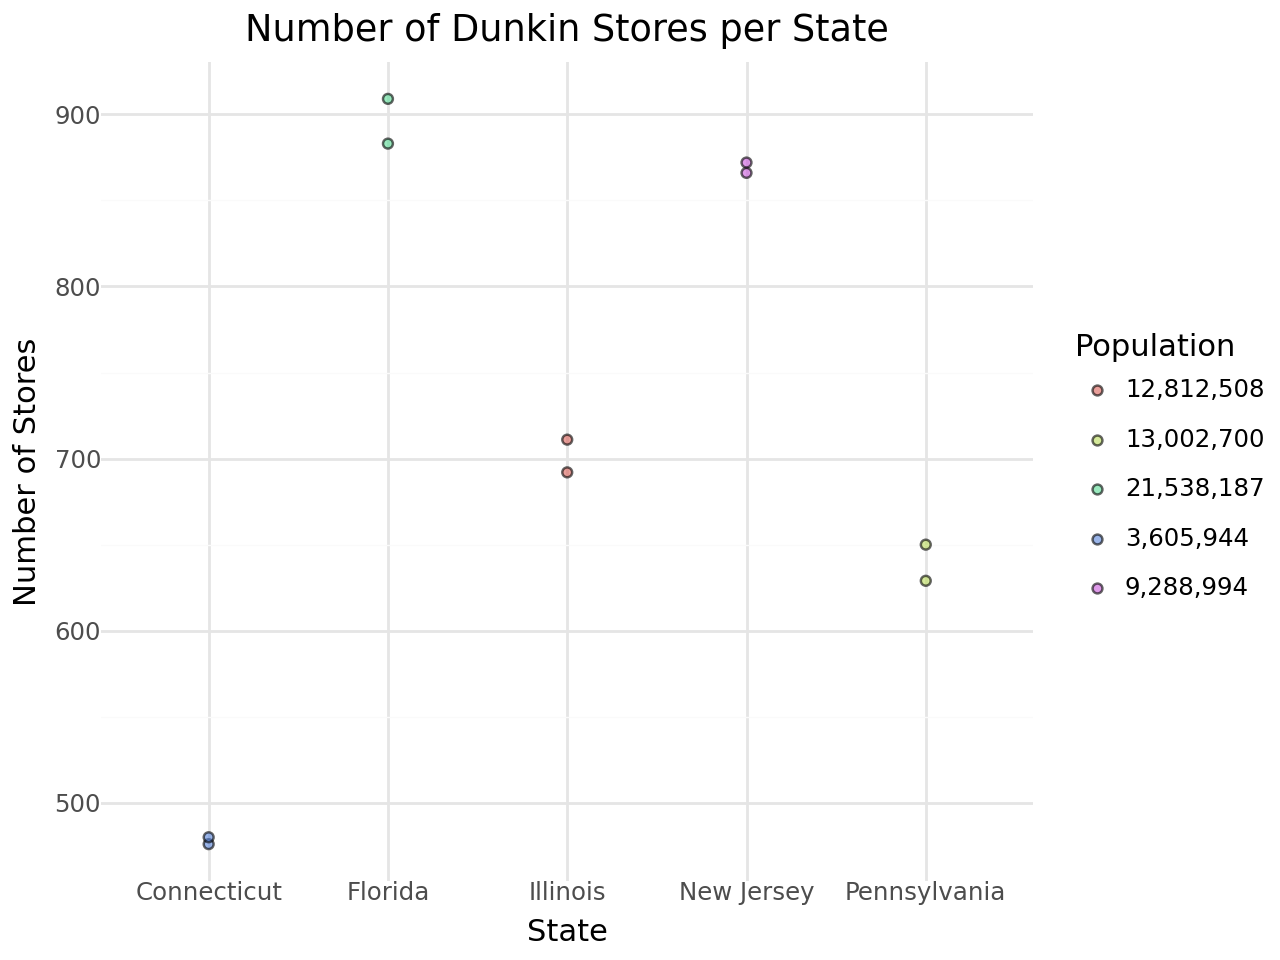

In [66]:
from plotnine import *

state = (
    financial_coffee.groupby("State")
    .agg(mean_vol = ("Dunkin Stores", "mean"))
    .nlargest(5, "mean_vol")
    .reset_index()
)
financial_coffee2 = financial_coffee[financial_coffee["State"].isin(state["State"])]

(ggplot(financial_coffee2, aes(x = "State", y = "Dunkin Stores", fill = "Population"))
    + geom_point(alpha = 0.6, color = "black", stroke = 0.5)
    + labs(title = "Number of Dunkin Stores per State", x = "State", y = "Number of Stores")
    + theme_minimal()
    )

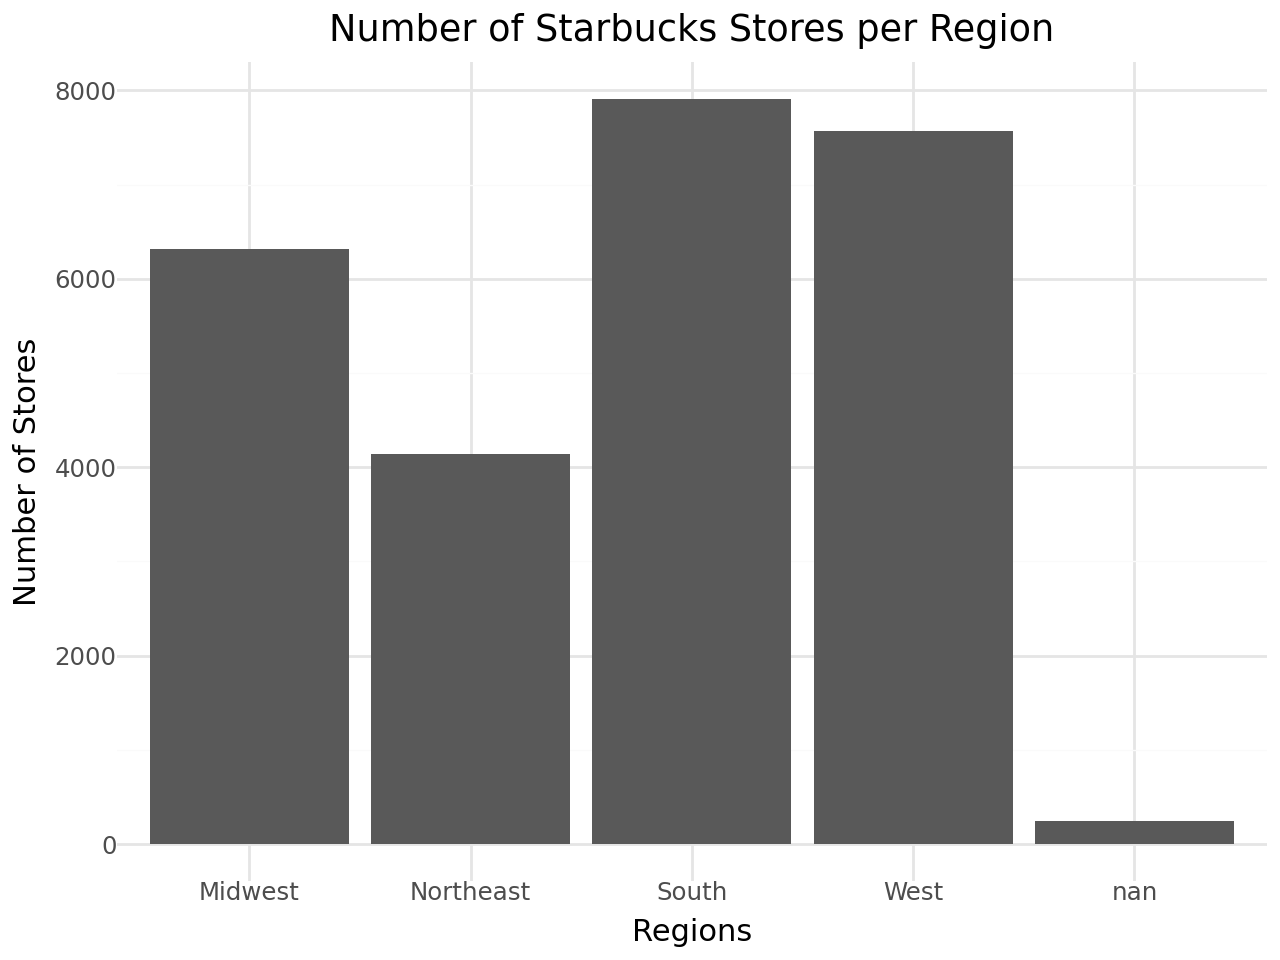

In [67]:
from plotnine import *

(ggplot(financial_coffee, aes(x = "Regions", y = "Starbucks Stores"))
    + geom_bar(stat = 'identity')
    + labs(title = "Number of Starbucks Stores per Region", x = "Regions", y = "Number of Stores")
    + theme_minimal()
    )

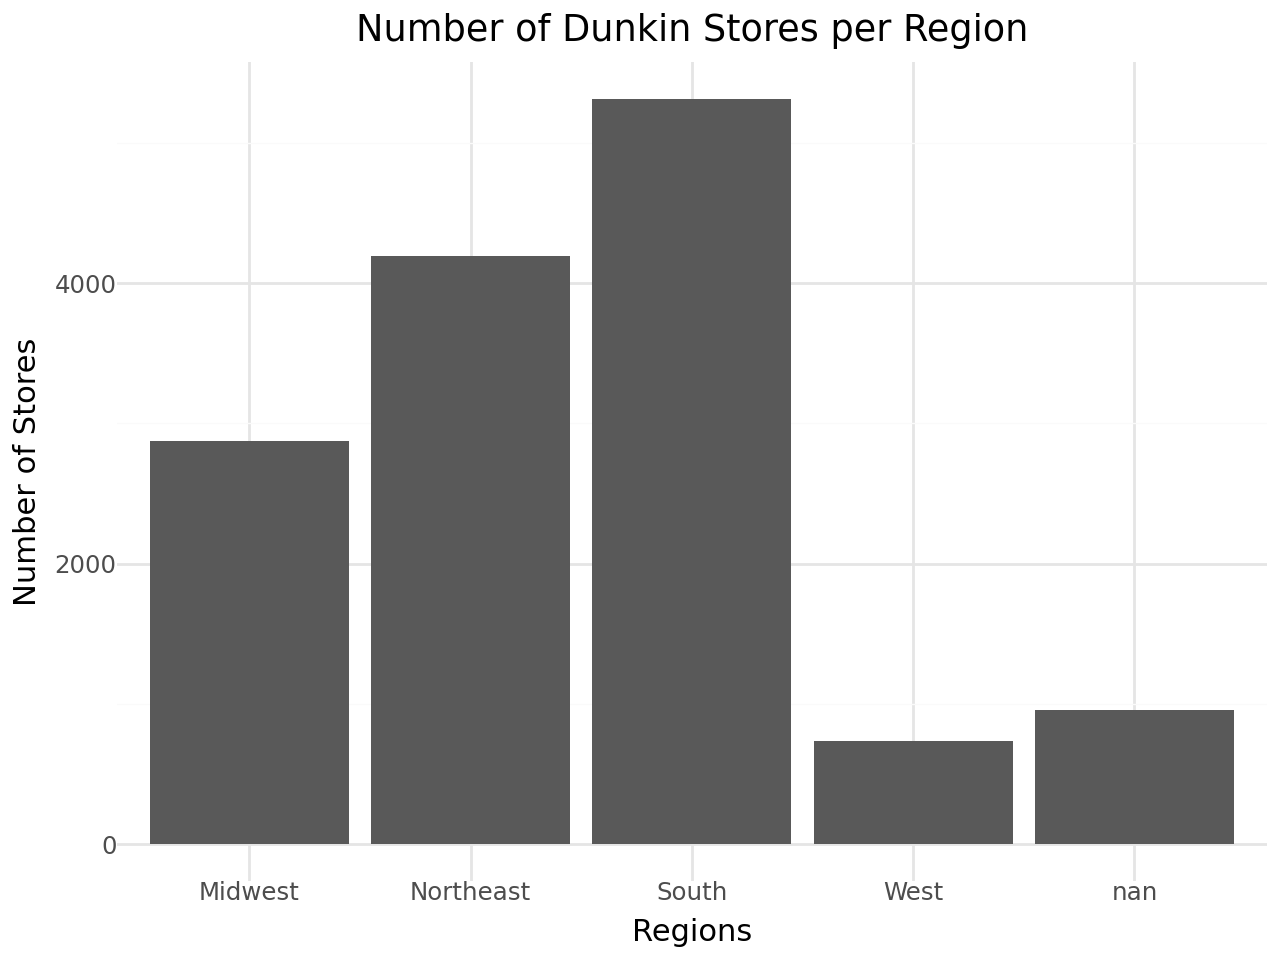

In [68]:
(ggplot(financial_coffee, aes(x = "Regions", y = "Dunkin Stores"))
    + geom_bar(stat = 'identity')
    + labs(title = "Number of Dunkin Stores per Region", x = "Regions", y = "Number of Stores")
    + theme_minimal()
    )

## Automate

### Convert your code for Exercises 1-3 above to a function that takes a single argument: the URL. This function should

* Scrape the information on state names and corresponding number of store locations on the webpage specified (assume the page has a table in the same form and placement as the ones you scraped above)

* Extract the name of the company from either the URL specified or the webpage (assume the URL will have the same format as the ones used above)

* Return a clean, organized and tidy dataset. Find a page other than Starbucks and Dunkin’ Donuts to test this on to confirm that it works. It’s fine if this is not related to coffee.

In [26]:
import re
def scrape_store_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    company_name = re.search(r'state-rankings/(.*?)-by-state', url).group(1).replace('-', ' ').title()
    table = soup.find('table', class_ = 'wpr-table')
    states_list = [th.get_text(strip = True) for th in table.find_all('th')[3:]]
    headers = []
    rows = []
    states_list = []
   
   # add state names to state list
    for th in table.find_all('th', class_ = "datatable-th"):
        header = th.get_text(strip = True)
        headers.append(header)
    index = len(table.find_all('th', class_ = "datatable-th"))

    for th in table.find_all('th')[index:]:
        states = th.get_text(strip = True)
        states_list.append(states)

    for i, tr in enumerate(table.find_all('tr')[1:]):
        state = states_list[i]
        cells = tr.find_all('td')
        row_data = {"State": states_list[i]}
        for j, cell in enumerate(cells):
            cell_tag = cell.find("a") or cell
            row_data[headers[j + 1]] = cell_tag.get_text(strip =True)
        rows.append(row_data)
    df = pd.DataFrame(rows)
    df_long = df.melt(id_vars = "State", var_name = "Year", value_name = "Count")
    df_long["Store"] = df_long["Year"].apply(lambda x: x.split()[0])
    df_long["Year"] = df_long["Year"].apply(lambda x: re.search(r'(\d{4})', x).group(0) if re.search(r'(\d{4})', x) else None)

    
    return df_long

In [27]:
# test function
url = "https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state"
scrape_store_data(url)

,State,Year,Count,Store
0,Texas,2024,489,Chick-Fil-A
1,Florida,2024,334,Chick-Fil-A
2,Georgia,2024,327,Chick-Fil-A
3,California,2024,243,Chick-Fil-A
4,North Carolina,2024,174,Chick-Fil-A
...,...,...,...,...
97,Maine,2023,2,Chick-Fil-A
98,Rhode Island,2023,2,Chick-Fil-A
99,Wyoming,2023,1,Chick-Fil-A
100,Alaska,2023,,Chick-Fil-A


In [28]:
# test function
url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
scrape_store_data(url)

,State,Year,Count,Store
0,California,2023,"3,080",Starbucks
1,Texas,2023,"1,346",Starbucks
2,Florida,2023,844,Starbucks
3,Washington,2023,741,Starbucks
4,New York,2023,692,Starbucks
...,...,...,...,...
148,South Dakota,2024,,Starbucks
149,West Virginia,2024,,Starbucks
150,Wyoming,2024,,Starbucks
151,North Dakota,2024,,Starbucks


### Appendix and References

https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state

https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state

https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population

https://worldpopulationreview.com/state-rankings/chick-fil-a-by-state

https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States 

https://finance.yahoo.com/quote/SBUX/

https://www.investing.com/equities/dunkin-brands-group


Generative A.I. Statement: Chat-GPT was used to suggest changes in code to debug errors. An example of errors include, incorrect syntax, incorrect usage of parameters for plots, making suggestions to fix parameters to resolve the error in code. Chat-GPT was only used to resolve errors in already hand written code. 